In [1]:
#LOPEZ MUÑOZ JOSE LUIS
!pip install apyori

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=04ee842e8f3a78d9b0742f4c9b12a680d30fadee5a93d95e4c7c28567303b376
  Stored in directory: c:\users\josel\appdata\local\pip\cache\wheels\32\2a\54\10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


In [2]:
import pandas as pd   # manipulacion y analisis de datos
import numpy as np    #vectores y matrices de n dimensiones
import matplotlib.pyplot as plt   #generar graficas apartir de de los datos
from apyori import apriori

In [6]:
DatosMovies = pd.read_csv('PracticasIA/movies.csv')
DatosMovies

,The Revenant,13 Hours,Allied,Zootopia,Jigsaw,Achorman,Grinch,Fast and Furious,Ghostbusters,Wolverine,Mad Max,John Wick,La La Land,The Good Dunosaur,Ninja Turtles,The Good Dunosaur Bad Moms,2 Guns,Inside Out,Valerian,Spiderman 3
0,Beirut,Martian,Get Out,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Deadpool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,X-Men,Allied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ninja Turtles,Moana,Ghost in the Shell,Ralph Breaks the Internet,John Wick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mad Max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7454,Big Sick,Looper,Hulk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7455,Beirut,Intern,Get Out,Hotel Transylvania,Mamma Mia,John Wick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7456,Captain America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7457,Green Lantern,John Wick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#se incluyen todas las transacciones en una sola lista
# -1 significa dimension no conocida
Transacciones = DatosMovies.values.reshape(-1).tolist()
Lista = pd.DataFrame(Transacciones)
Lista
Lista['Frecuencia'] = 1
Lista

,0,Frecuencia
0,Beirut,1
1,Martian,1
2,Get Out,1
3,NaN,1
4,NaN,1
...,...,...
149175,NaN,1
149176,NaN,1
149177,NaN,1
149178,NaN,1


In [13]:
#Agrupando los elemntos 
#Se agrupa los elementos
Lista = Lista.groupby(by=[0], as_index=False).count().sort_values(by=['Frecuencia'], ascending=True) #Conteo
Lista['Porcentaje'] = (Lista['Frecuencia'] / Lista['Frecuencia'].sum()) #Porcentaje
Lista = Lista.rename(columns={0 : 'Item'})
Lista

,Item,Frecuencia,Porcentaje
106,Vampire in Brooklyn,3,0.000102
63,Lady Bird,5,0.000171
34,Finding Dory,7,0.000239
11,Bad Moms,14,0.000478
118,water spray,29,0.000990
...,...,...,...
25,Coco,1229,0.041944
44,Hotel Transylvania,1280,0.043685
103,Tomb Rider,1305,0.044538
37,Get Out,1346,0.045937


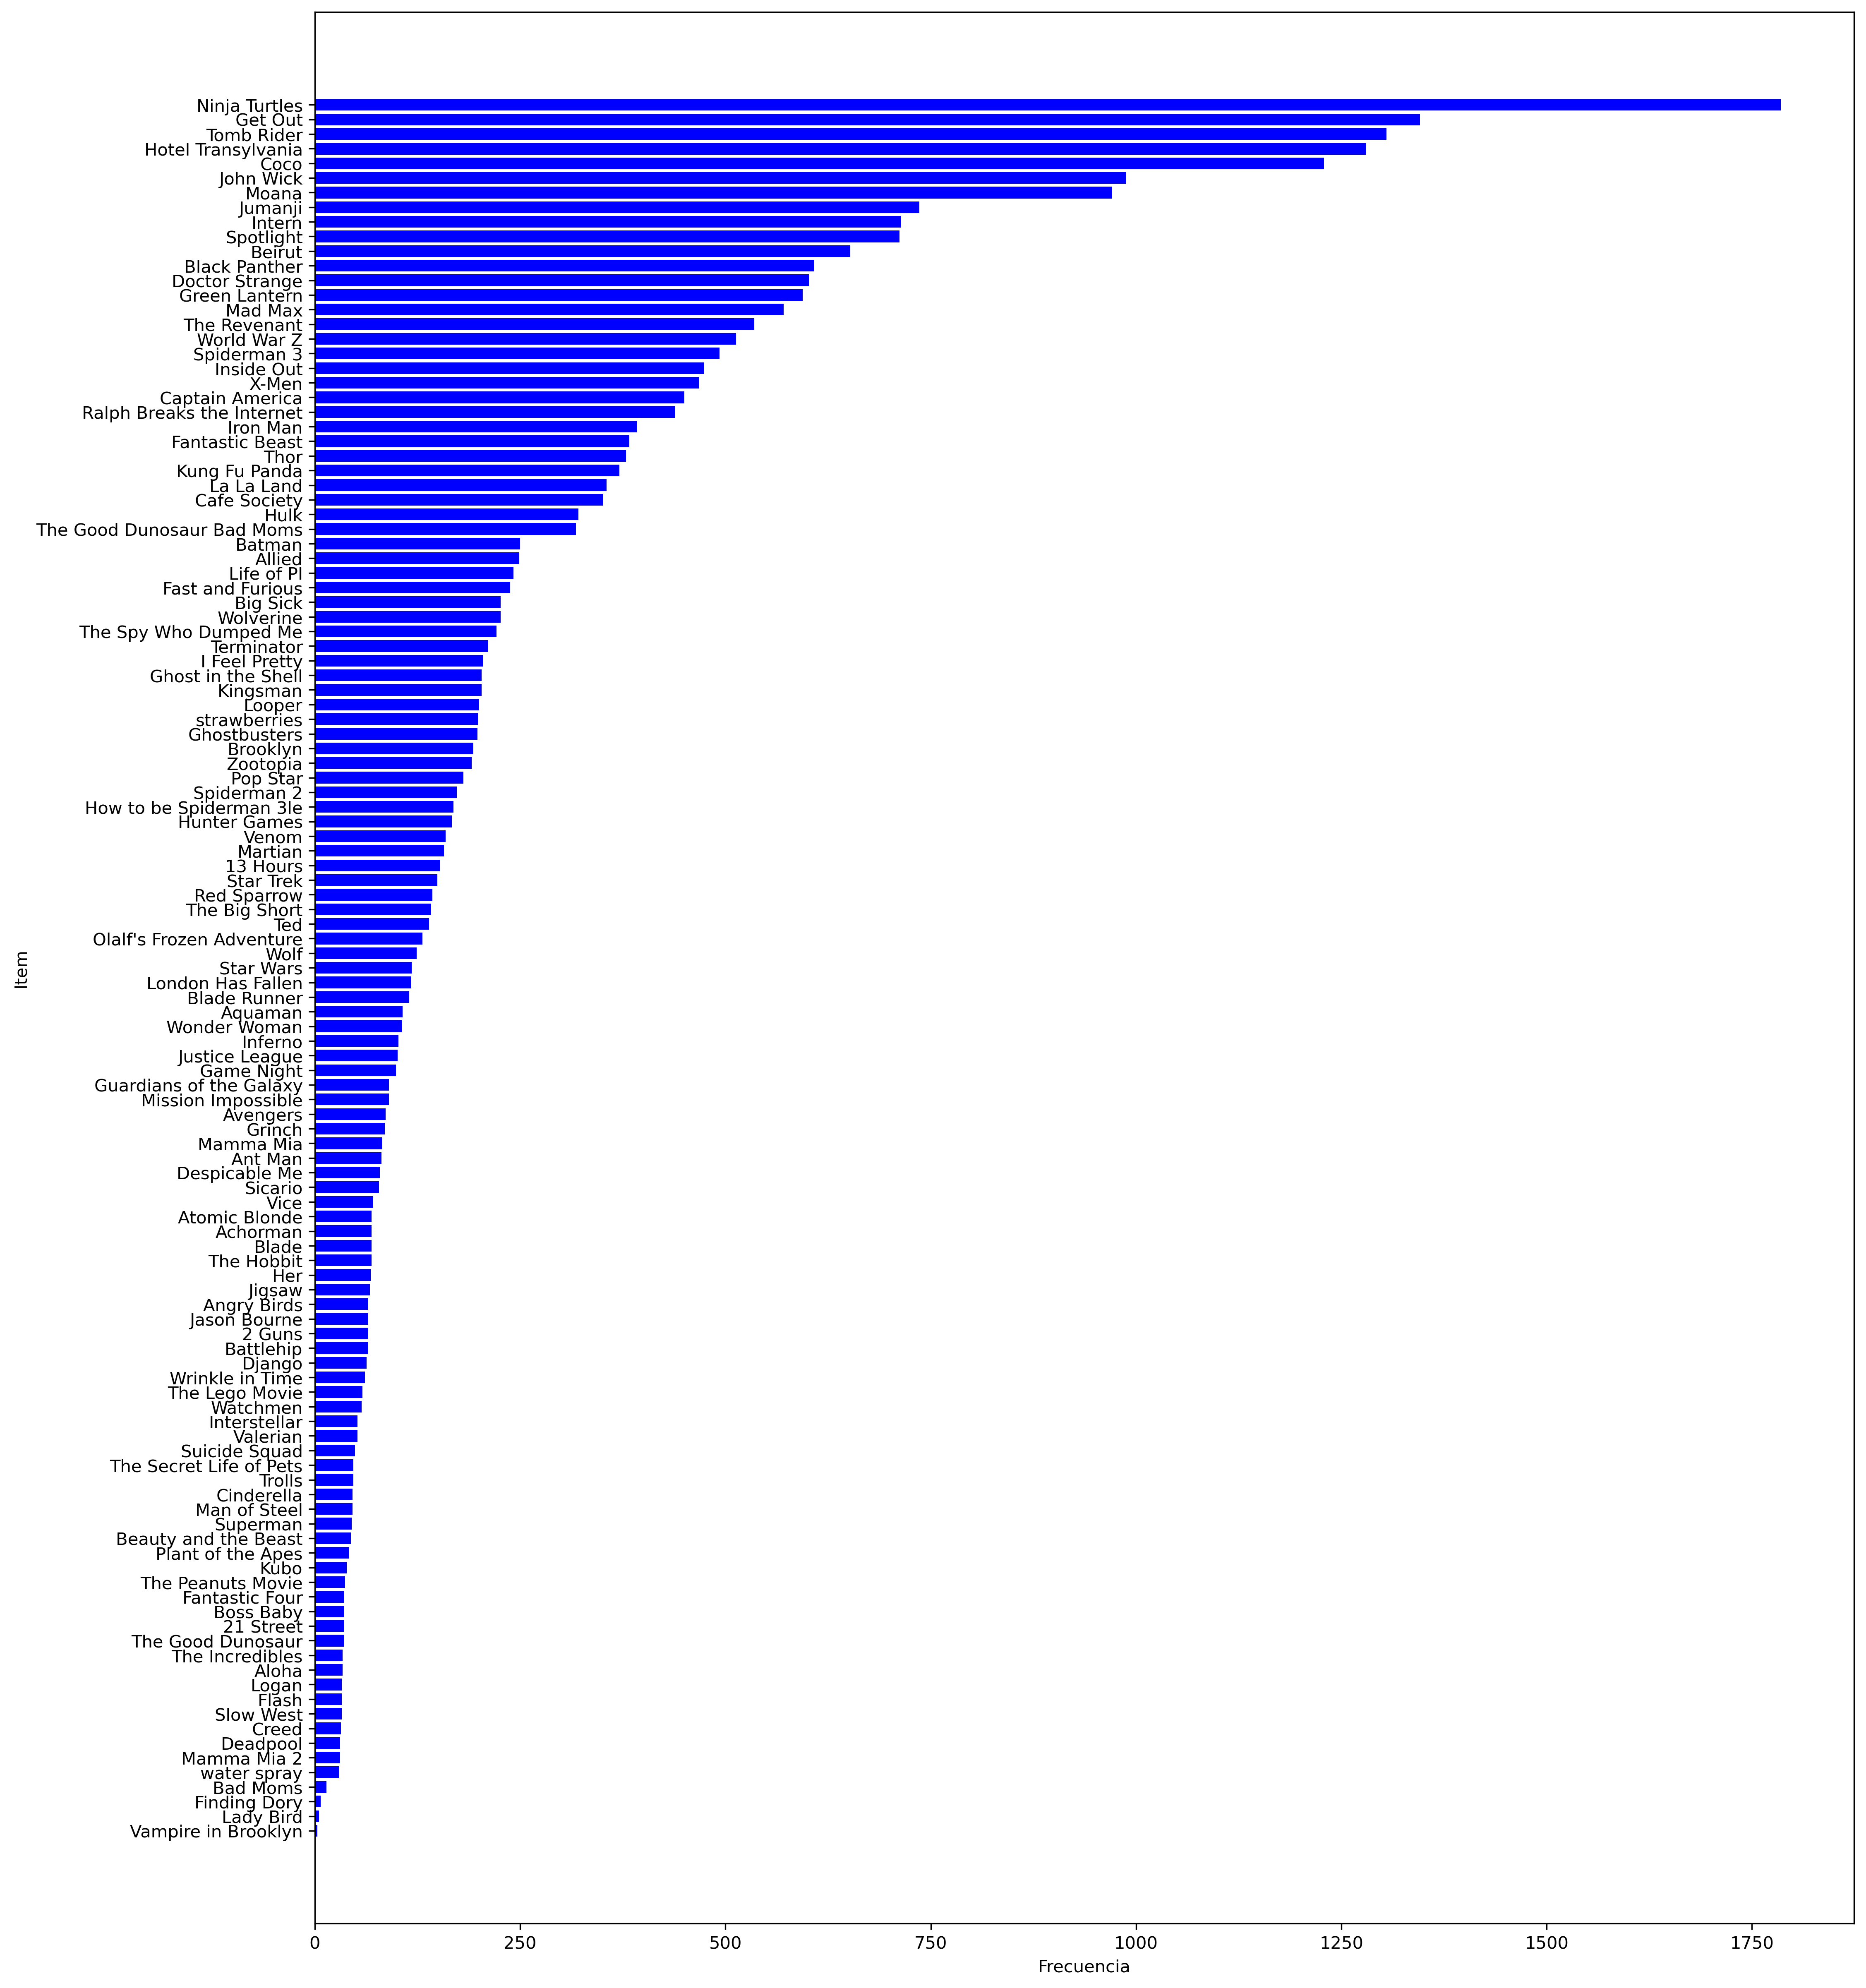

In [14]:
# Se genera un gráfico de barras
plt.figure(figsize=(16,20), dpi=300)
plt.ylabel('Item')
plt.xlabel('Frecuencia')
plt.barh(Lista['Item'], width=Lista['Frecuencia'], color='blue')
plt.show()

In [15]:
#Se crea una lista de listas a partir del dataframe y se remueven los 'NaN'
#level=0 especifica desde el primer índice
MoviesLista = DatosMovies.stack().groupby(level=0).apply(list).tolist()
MoviesLista 

[['Beirut', 'Martian', 'Get Out'],
 ['Deadpool'],
 ['X-Men', 'Allied'],
 ['Ninja Turtles',
  'Moana',
  'Ghost in the Shell',
  'Ralph Breaks the Internet',
  'John Wick'],
 ['Mad Max'],
 ['The Spy Who Dumped Me', 'Hotel Transylvania'],
 ['Thor', 'London Has Fallen', 'The Lego Movie'],
 ['Intern', 'Tomb Rider', 'John Wick'],
 ['Hotel Transylvania'],
 ['Get Out', 'Suicide Squad'],
 ['Doctor Strange'],
 ['X-Men', 'Beirut', 'Ninja Turtles', 'Get Out', 'Fantastic Beast'],
 ['Tomb Rider', 'Cafe Society', 'Doctor Strange'],
 ['Ninja Turtles', 'The Good Dunosaur Bad Moms'],
 ['Ninja Turtles'],
 ['The Revenant',
  'Coco',
  'Captain America',
  'La La Land',
  'Spiderman 2',
  'Fantastic Beast',
  'Mad Max'],
 ['X-Men', 'Get Out'],
 ['X-Men',
  'Hunter Games',
  'World War Z',
  'Tomb Rider',
  'Ninja Turtles',
  'Aquaman',
  'The Good Dunosaur Bad Moms',
  'Get Out',
  'Captain America',
  'Guardians of the Galaxy'],
 ['Martian', 'Moana', 'La La Land', 'Hotel Transylvania', 'Ted'],
 ['Termina

In [21]:
ReglasC1 = apriori(MoviesLista, 
                   min_support=0.01, 
                   min_confidence=0.3, 
                   min_lift=2)

In [22]:
ResultadosC1 = list(ReglasC1)

In [23]:
ResultadosC1

[RelationRecord(items=frozenset({'Jumanji', 'Kung Fu Panda'}), support=0.016087947446038343, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Kung Fu Panda'}), items_add=frozenset({'Jumanji'}), confidence=0.32345013477088946, lift=3.278008906597914)]),
 RelationRecord(items=frozenset({'Jumanji', 'Tomb Rider'}), support=0.03941547124279394, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Jumanji'}), items_add=frozenset({'Tomb Rider'}), confidence=0.39945652173913043, lift=2.2831771614192906)]),
 RelationRecord(items=frozenset({'Moana', 'Thor'}), support=0.015283550073736427, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Thor'}), items_add=frozenset({'Moana'}), confidence=0.3007915567282322, lift=2.310611968729026)]),
 RelationRecord(items=frozenset({'Terminator', 'Tomb Rider'}), support=0.010323099611207937, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Terminator'}), items_add=frozenset({'Tomb Rider'}), confidence=0.36492890995260663, 

In [24]:
pd.DataFrame(ResultadosC1)

,items,support,ordered_statistics
0,"(Jumanji, Kung Fu Panda)",0.016088,"[((Kung Fu Panda), (Jumanji), 0.32345013477088..."
1,"(Jumanji, Tomb Rider)",0.039415,"[((Jumanji), (Tomb Rider), 0.39945652173913043..."
2,"(Moana, Thor)",0.015284,"[((Thor), (Moana), 0.3007915567282322, 2.31061..."
3,"(Terminator, Tomb Rider)",0.010323,"[((Terminator), (Tomb Rider), 0.36492890995260..."
4,"(Get Out, Jumanji, Ninja Turtles)",0.010189,"[((Get Out, Jumanji), (Ninja Turtles), 0.50666..."
5,"(Moana, Intern, Ninja Turtles)",0.011127,"[((Intern, Ninja Turtles), (Moana), 0.30970149..."
6,"(Moana, Jumanji, Ninja Turtles)",0.011127,"[((Moana, Jumanji), (Ninja Turtles), 0.5030303..."
7,"(Jumanji, Tomb Rider, Ninja Turtles)",0.017160,"[((Jumanji, Ninja Turtles), (Tomb Rider), 0.41..."
8,"(Spiderman 3, Tomb Rider, Ninja Turtles)",0.010323,"[((Spiderman 3, Ninja Turtles), (Tomb Rider), ..."


In [25]:
for item in ResultadosC1:
  #El primer índice de la lista
  Emparejar = item[0]
  items = [x for x in Emparejar]
  print("Regla: " + str(item[0]))

  #El segundo índice de la lista
  print("Soporte: " + str(item[1]))

  #El tercer índice de la lista
  print("Confianza: " + str(item[2][0][2]))
  print("Elevación: " + str(item[2][0][3])) 
  print("=====================================") 

Regla: frozenset({'Jumanji', 'Kung Fu Panda'})
Soporte: 0.016087947446038343
Confianza: 0.32345013477088946
Elevación: 3.278008906597914
Regla: frozenset({'Jumanji', 'Tomb Rider'})
Soporte: 0.03941547124279394
Confianza: 0.39945652173913043
Elevación: 2.2831771614192906
Regla: frozenset({'Moana', 'Thor'})
Soporte: 0.015283550073736427
Confianza: 0.3007915567282322
Elevación: 2.310611968729026
Regla: frozenset({'Terminator', 'Tomb Rider'})
Soporte: 0.010323099611207937
Confianza: 0.36492890995260663
Elevación: 2.0858273864647456
Regla: frozenset({'Get Out', 'Jumanji', 'Ninja Turtles'})
Soporte: 0.01018903338249095
Confianza: 0.5066666666666667
Elevación: 2.117213818860878
Regla: frozenset({'Moana', 'Intern', 'Ninja Turtles'})
Soporte: 0.011127496983509854
Confianza: 0.30970149253731344
Elevación: 2.3790560585332865
Regla: frozenset({'Moana', 'Jumanji', 'Ninja Turtles'})
Soporte: 0.011127496983509854
Confianza: 0.503030303030303
Elevación: 2.1020185043714457
Regla: frozenset({'Jumanji', 

In [26]:
# configuracion2

ReglasC2 = apriori(MoviesLista, 
                   min_support=0.028, 
                   min_confidence=0.3, 
                   min_lift = 1.1)

In [27]:
ResultadosC2 = list(ReglasC2)

In [28]:
ResultadosC2 

[RelationRecord(items=frozenset({'Get Out', 'Beirut'}), support=0.028958305402869016, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Beirut'}), items_add=frozenset({'Get Out'}), confidence=0.3312883435582822, lift=1.8358690598820409)]),
 RelationRecord(items=frozenset({'Coco', 'Ninja Turtles'}), support=0.052956160343209546, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Coco'}), items_add=frozenset({'Ninja Turtles'}), confidence=0.32166123778501626, lift=1.3441295084809166)]),
 RelationRecord(items=frozenset({'Intern', 'Ninja Turtles'}), support=0.0359297492961523, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Intern'}), items_add=frozenset({'Ninja Turtles'}), confidence=0.37535014005602246, lift=1.5684799409960064)]),
 RelationRecord(items=frozenset({'Jumanji', 'Ninja Turtles'}), support=0.041158332216114764, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Jumanji'}), items_add=frozenset({'Ninja Turtles'}), confidence=0.417119565217

In [29]:
pd.DataFrame(ResultadosC2)

,items,support,ordered_statistics
0,"(Get Out, Beirut)",0.028958,"[((Beirut), (Get Out), 0.3312883435582822, 1.8..."
1,"(Coco, Ninja Turtles)",0.052956,"[((Coco), (Ninja Turtles), 0.32166123778501626..."
2,"(Intern, Ninja Turtles)",0.035930,"[((Intern), (Ninja Turtles), 0.375350140056022..."
3,"(Jumanji, Ninja Turtles)",0.041158,"[((Jumanji), (Ninja Turtles), 0.41711956521739..."
4,"(Jumanji, Tomb Rider)",0.039415,"[((Jumanji), (Tomb Rider), 0.39945652173913043..."
5,"(Moana, Ninja Turtles)",0.048264,"[((Moana), (Ninja Turtles), 0.3707518022657055..."
6,"(Spotlight, Ninja Turtles)",0.033919,"[((Spotlight), (Ninja Turtles), 0.355337078651..."
7,"(Tomb Rider, Ninja Turtles)",0.060062,"[((Tomb Rider), (Ninja Turtles), 0.34329501915..."


In [30]:
print(ResultadosC2[0])

RelationRecord(items=frozenset({'Get Out', 'Beirut'}), support=0.028958305402869016, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Beirut'}), items_add=frozenset({'Get Out'}), confidence=0.3312883435582822, lift=1.8358690598820409)])


In [31]:
print(ResultadosC2[1])
print(ResultadosC2[2])

RelationRecord(items=frozenset({'Coco', 'Ninja Turtles'}), support=0.052956160343209546, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Coco'}), items_add=frozenset({'Ninja Turtles'}), confidence=0.32166123778501626, lift=1.3441295084809166)])
RelationRecord(items=frozenset({'Intern', 'Ninja Turtles'}), support=0.0359297492961523, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Intern'}), items_add=frozenset({'Ninja Turtles'}), confidence=0.37535014005602246, lift=1.5684799409960064)])


In [32]:
for item in ResultadosC2:
  #El primer índice de la lista
  Emparejar = item[0]
  items = [x for x in Emparejar]
  print("Regla: " + str(item[0]))

  #El segundo índice de la lista
  print("Soporte: " + str(item[1]))

  #El tercer índice de la lista
  print("Confianza: " + str(item[2][0][2]))
  print("Elevación: " + str(item[2][0][3])) 
  print("=====================================") 

Regla: frozenset({'Get Out', 'Beirut'})
Soporte: 0.028958305402869016
Confianza: 0.3312883435582822
Elevación: 1.8358690598820409
Regla: frozenset({'Coco', 'Ninja Turtles'})
Soporte: 0.052956160343209546
Confianza: 0.32166123778501626
Elevación: 1.3441295084809166
Regla: frozenset({'Intern', 'Ninja Turtles'})
Soporte: 0.0359297492961523
Confianza: 0.37535014005602246
Elevación: 1.5684799409960064
Regla: frozenset({'Jumanji', 'Ninja Turtles'})
Soporte: 0.041158332216114764
Confianza: 0.41711956521739135
Elevación: 1.7430223176227015
Regla: frozenset({'Jumanji', 'Tomb Rider'})
Soporte: 0.03941547124279394
Confianza: 0.39945652173913043
Elevación: 2.2831771614192906
Regla: frozenset({'Moana', 'Ninja Turtles'})
Soporte: 0.04826384233811503
Confianza: 0.3707518022657055
Elevación: 1.549264814061567
Regla: frozenset({'Spotlight', 'Ninja Turtles'})
Soporte: 0.033918755865397505
Confianza: 0.3553370786516854
Elevación: 1.4848511314638215
Regla: frozenset({'Tomb Rider', 'Ninja Turtles'})
Soport

In [41]:
#Configuracion3
ReglasC3 = apriori(MoviesLista, 
                   min_support=0.040, 
                   min_confidence=0.3, 
                   min_lift = 1.2)

In [42]:
ResultadosC3 = list(ReglasC3)

In [43]:
ResultadosC3 

[RelationRecord(items=frozenset({'Coco', 'Ninja Turtles'}), support=0.052956160343209546, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Coco'}), items_add=frozenset({'Ninja Turtles'}), confidence=0.32166123778501626, lift=1.3441295084809166)]),
 RelationRecord(items=frozenset({'Jumanji', 'Ninja Turtles'}), support=0.041158332216114764, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Jumanji'}), items_add=frozenset({'Ninja Turtles'}), confidence=0.41711956521739135, lift=1.7430223176227015)]),
 RelationRecord(items=frozenset({'Moana', 'Ninja Turtles'}), support=0.04826384233811503, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Moana'}), items_add=frozenset({'Ninja Turtles'}), confidence=0.3707518022657055, lift=1.549264814061567)]),
 RelationRecord(items=frozenset({'Tomb Rider', 'Ninja Turtles'}), support=0.06006167046520981, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Tomb Rider'}), items_add=frozenset({'Ninja Turtles'}), confiden

In [44]:
pd.DataFrame(ResultadosC3)

,items,support,ordered_statistics
0,"(Coco, Ninja Turtles)",0.052956,"[((Coco), (Ninja Turtles), 0.32166123778501626..."
1,"(Jumanji, Ninja Turtles)",0.041158,"[((Jumanji), (Ninja Turtles), 0.41711956521739..."
2,"(Moana, Ninja Turtles)",0.048264,"[((Moana), (Ninja Turtles), 0.3707518022657055..."
3,"(Tomb Rider, Ninja Turtles)",0.060062,"[((Tomb Rider), (Ninja Turtles), 0.34329501915..."


In [45]:
for item in ResultadosC3:
  #El primer índice de la lista
  Emparejar = item[0]
  items = [x for x in Emparejar]
  print("Regla: " + str(item[0]))

  #El segundo índice de la lista
  print("Soporte: " + str(item[1]))

  #El tercer índice de la lista
  print("Confianza: " + str(item[2][0][2]))
  print("Elevación: " + str(item[2][0][3])) 
  print("=====================================") 

Regla: frozenset({'Coco', 'Ninja Turtles'})
Soporte: 0.052956160343209546
Confianza: 0.32166123778501626
Elevación: 1.3441295084809166
Regla: frozenset({'Jumanji', 'Ninja Turtles'})
Soporte: 0.041158332216114764
Confianza: 0.41711956521739135
Elevación: 1.7430223176227015
Regla: frozenset({'Moana', 'Ninja Turtles'})
Soporte: 0.04826384233811503
Confianza: 0.3707518022657055
Elevación: 1.549264814061567
Regla: frozenset({'Tomb Rider', 'Ninja Turtles'})
Soporte: 0.06006167046520981
Confianza: 0.3432950191570881
Elevación: 1.4345308391555855
